In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

<Axes: xlabel='Years', ylabel='Months'>

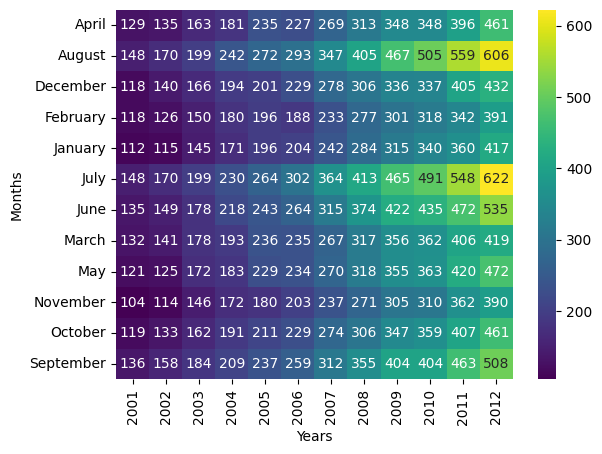

In [9]:
# Задание 1 Использование тепловых карт для поиска шаблонов в данных о пассажирах рейса

# С помощью pandas считывать данные, расположенные в подкаталоге. 
# Данный набор данных содержит ежемесячные данные по пассажирам рейсов 
# за период с 2001 по 2012 год
flight_details = pd.read_csv('data/flight_details.csv')

# Используйте тепловую карту для визуализации данных.
# Используйте собственную цветную карту. Убедитесь, что наименьшее 
# значение - самый темный цвет, а наибольшее - самый яркий.
sns.heatmap(flight_details.pivot_table(index='Months', columns='Years', values='Passengers'), annot=True, fmt='g', cmap='viridis')

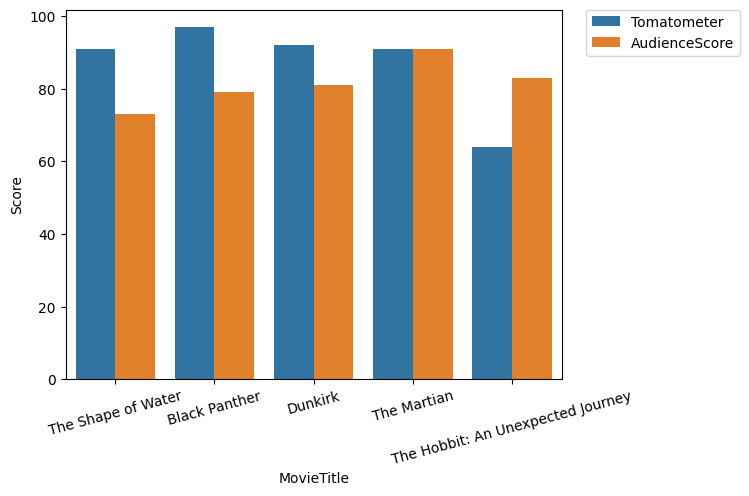

In [19]:
# Задание 2 Пересмотр сравнения фильмов
# В этом упражнении мы будем использовать сюжет бара для сравнения 
# баллов фильмов. Вам будут предложены пять фильмов с оценкой "Гнилые 
# помидоры". Томатометр - это процент от одобренных критиков Томатометра, 
# которые дали положительный отзыв на фильм. Оценка зрительских симпатий 
# - это процент пользователей, которые дали оценку 3,5 или выше из 5. Сравните 
# эти два балла среди пяти фильмов

movie_scores = pd.read_csv('data/movie_scores.csv', index_col=0)
sns.barplot(x='MovieTitle', y='Score', hue='ScoreType', data=movie_scores.melt(id_vars='MovieTitle', var_name='ScoreType', value_name='Score'))
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: >

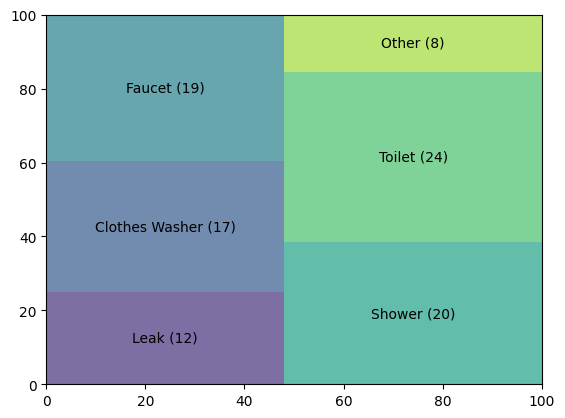

In [28]:
water_usage = pd.read_csv("data/water_usage.csv", index_col=0)
# cols Usage, Percentage
# Using squarify, plot the data as a treemap.
# Use the Percentage column to determine the area of the square.
# Use the Usage column to determine the color and label of the square.
# label = f"{water_usage['Usage']} ({water_usage['Percentage']})"
# CODE
labels = [f"{row.Usage} ({row.Percentage})" for row in water_usage.itertuples()]
squarify.plot(sizes=water_usage['Percentage'], label=labels, color=sns.color_palette('viridis', len(water_usage)), alpha=0.7)